# **Early Stage Diabetes Risk Prediction** 🔎
This notebook demonstrates a full machine learning workflow for predicting early stage diabetes risk using the UCI dataset.

## **Project Overview**
- Understand and explore the dataset
- Preprocess and clean the data
- Apply and compare multiple machine learning models
- Evaluate model performance
- Visualize key insights

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression



In [36]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [37]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)


{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

In [38]:
X.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [39]:
X.shape

(520, 16)

In [40]:
X.dtypes

age                    int64
gender                object
polyuria              object
polydipsia            object
sudden_weight_loss    object
weakness              object
polyphagia            object
genital_thrush        object
visual_blurring       object
itching               object
irritability          object
delayed_healing       object
partial_paresis       object
muscle_stiffness      object
alopecia              object
obesity               object
dtype: object

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
dtypes: int64(1), object(15)
me

In [42]:
X.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [43]:
X.isnull().sum() #Checking the missing values in each coloumn

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64



```
# This is formatted as code
```

## MODEL 1: LOGISTIC REGRESSION

In [44]:
# Trying logistic regression
# Splitting data into training and testing sets (e.g., 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [45]:
# Binary columns in the dataset
binary_cols = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
               'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
               'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']

# Mapping the coloumns
binary_map = {'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0}

# Encoding training and test sets
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
X_train_enc[binary_cols] = X_train_enc[binary_cols].replace(binary_map)
X_test_enc[binary_cols] = X_test_enc[binary_cols].replace(binary_map)


C:\Users\drish\AppData\Local\Temp\ipykernel_23916\2262011639.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_enc[binary_cols] = X_train_enc[binary_cols].replace(binary_map)
C:\Users\drish\AppData\Local\Temp\ipykernel_23916\2262011639.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_enc[binary_cols] = X_test_enc[binary_cols].replace(binary_map)


In [46]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [47]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_enc, y_train_enc)

LogisticRegression(max_iter=200)

In [48]:
y_pred = logreg.predict(X_test_enc)

In [49]:
# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred)

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred)

In [51]:
# Classification Report
class_report = classification_report(y_test_enc, y_pred)

In [52]:
# ROC AUC
y_prob = logreg.predict_proba(X_test_enc)[:, 1]
roc_auc = roc_auc_score(y_test_enc, y_prob)

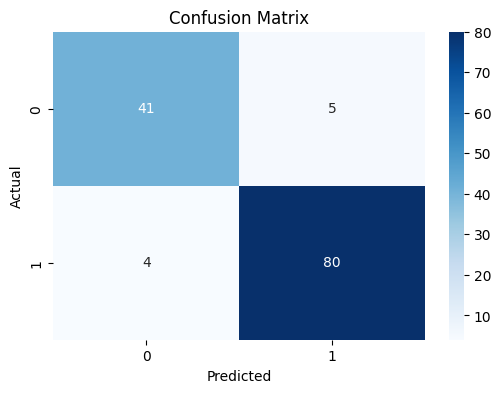

In [53]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('Classification Report:')
print(class_report)

Accuracy: 0.93
ROC AUC: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



##MODEL 2: NAIVE BAYES

In [55]:
mnb_model = MultinomialNB()

In [56]:
mnb_model.fit(X_train_enc, y_train_enc)


MultinomialNB()

In [57]:
# Predict on the test set
y_pred_mnb = mnb_model.predict(X_test_enc)

In [58]:
# Confusion Matrix
conf_matrix_mnb = confusion_matrix(y_test_enc, y_pred_mnb)
print("Confusion Matrix:")
print(conf_matrix_mnb)

Confusion Matrix:
[[40  6]
 [ 3 81]]


In [59]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_mnb))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.93      0.96      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



In [60]:
# ROC AUC (probability-based)
y_prob_mnb = mnb_model.predict_proba(X_test_enc)[:, 1]
roc_auc_mnb = roc_auc_score(y_test_enc, y_prob_mnb)
print(f"ROC AUC: {roc_auc_mnb:.2f}")


ROC AUC: 0.97


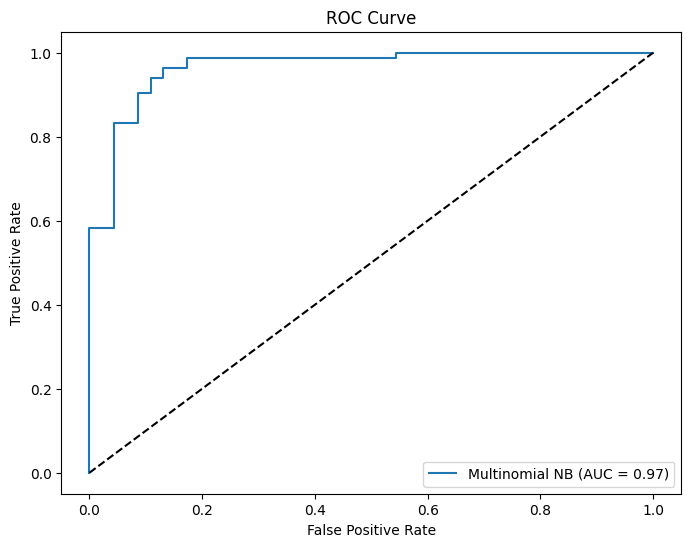

In [61]:
fpr, tpr, _ = roc_curve(y_test_enc, y_prob_mnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## MODEL 3: DECISION TREE

#### Libraries

In [62]:
#Decision tree imports
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

##MODEL 4: RANDOM FOREST
Build a predictive model to identify patients at high risk of diabetes from routine clinical measurements using Random Forest.

### Libraries and read file
Importing libraries that weren't called on previous models



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [64]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
df = pd.read_csv("diabetes_data_upload.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_data_upload.csv'

In [ ]:
print("Shape:", df.shape)
df.head()

Shape: (520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Stats and checking for null/missing values

In [ ]:
df.info() #it can count how many non nulls cells there are on the dataset

In [ ]:
df.describe().T #basic stats from dataset


In [ ]:
missing = df.isnull().sum() #df.isnull() returns a dataframe as the shape of df where the cells are either true
                            #(is null) or false (theres a valid value on that cell).
                            #since 1 is true and 0 is false, if sum() comes back 0, means all values are false == have a valid value == no null cells
zeros   = (df == 0).sum()   #this does a similar job to understand which values are zero, for our dataset that is important
                            # we dont want BMI 0 for example, that means the value was not calculated properly
print("Missing values per column:\n", missing)
print("Zero values per column:\n", zeros)

### Data preparation
My task was to creat a ML model using random forest, so I need to make sure there are only numeric inputs.

In [ ]:
df_encoded = df.copy() #make a copy of dataframe

In [ ]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
symptom_col = [ 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
df_encoded.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df_encoded[symptom_col] = df_encoded[symptom_col].replace({'Yes': 1, 'No': 0})
df_encoded.head()


<ipython-input-49-2007645042ab>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[symptom_col] = df_encoded[symptom_col].replace({'Yes': 1, 'No': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [ ]:
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [ ]:

df_encoded['class'] = df_encoded['class'].replace({'Positive': 1, 'Negative': 0})
df_encoded.head()


<ipython-input-51-3a0f75964abf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['class'] = df_encoded['class'].replace({'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Polyuria'].plot(kind='hist', bins=20, title='Polyuria')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Polydipsia'].plot(kind='hist', bins=20, title='Polydipsia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sudden weight loss'].plot(kind='hist', bins=20, title='sudden weight loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Polyuria', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Polyuria', y='Polydipsia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Polydipsia', y='sudden weight loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sudden weight loss', y='Polyphagia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Polyuria']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Polyuria')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Polydipsia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Polydipsia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Genital thrush']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Genital thrush')

from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Polyuria'].plot(kind='line', figsize=(8, 4), title='Polyuria')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Polydipsia'].plot(kind='line', figsize=(8, 4), title='Polydipsia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['sudden weight loss'].plot(kind='line', figsize=(8, 4), title='sudden weight loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Polyuria'].plot(kind='hist', bins=20, title='Polyuria')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Polydipsia'].plot(kind='hist', bins=20, title='Polydipsia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Age', y='Polyuria', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Polyuria', y='Polydipsia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Polydipsia', y='sudden weight loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Polyuria']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Polyuria')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Polydipsia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Polydipsia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Genital thrush']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Genital thrush')

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Polyuria'].plot(kind='line', figsize=(8, 4), title='Polyuria')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Polydipsia'].plot(kind='line', figsize=(8, 4), title='Polydipsia')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(df_encoded.dtypes) #checking All attributes are now int, ready to split the dataset


Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


### Split Dataset

In [ ]:
#Scikit-learn models expect these predictors and target variable to be two objects separately
X = df_encoded.drop('class', axis=1) #making x have all predictors but the target variable class
y = df_encoded['class'] # calling taget variable class

#sanity check
print(X.shape)
print(y.shape)

(520, 16)
(520,)


In [ ]:
counts = y.value_counts()
print(counts)

class
1    320
0    200
Name: count, dtype: int64


In [ ]:
#now splitting 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y) #statify balances the target variable


### Random Forest Model and fitting
A random forest builds many decision trees on random subsets of data and then aggegates their votes, this tends to reduce overfitting comparing to one big tree and capture more complex interactions. Starting with default parameters so later i can fine tune (number of trees, depth, etc)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)#   fit(...)  builds the ensemble of decision trees on your training data.
                        #   the model “learns” the relationship between the input features (e.g., age, symptoms) and the label (class).
                        #   basically it’s finding decision rules like example  "If glucose > 125 AND BMI category is ‘overweight,’ vote ‘diabetic.’”


RandomForestClassifier(random_state=42)

### Predictions and performance

In [ ]:
y_pred  = rf.predict(X_test)          # hard 0/1 labels, since i want to creat confusion matrix
y_proba = rf.predict_proba(X_test)[:,1]  # Predicted probabilities for the positive class, also want to see stats of my model

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9903846153846154


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



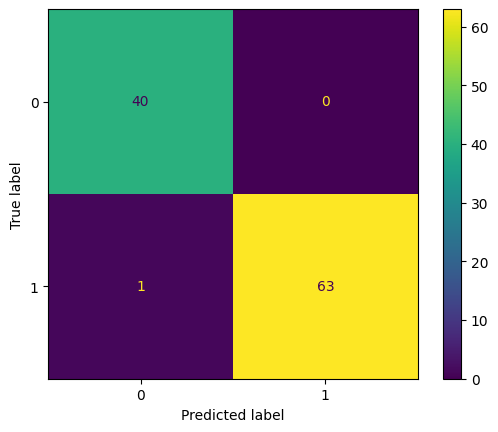

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [ ]:
print("\nROC AUC:", roc_auc_score(y_test, y_proba))


ROC AUC: 1.0


### Implementing cross validation and fine tune parameters


## MODEL 4: KNN NEAREST NEIGHBORS

### Libraries and obtain data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)
# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets
# metadata
print(early_stage_diabetes_risk_prediction.metadata)
# variable information
print(early_stage_diabetes_risk_prediction.variables)

{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

In [ ]:
#KNN Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Data preparation

In [ ]:
# Combine features and target into a single DataFrame called df
df = pd.concat([early_stage_diabetes_risk_prediction.data.features, early_stage_diabetes_risk_prediction.data.targets], axis=1)

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
#Unique values in each column
print("Unique values in each column:")
for col in df:
    print(f'{col} -> {df[col].unique()}')

Unique values in each column:
age -> [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
gender -> ['Male' 'Female']
polyuria -> ['No' 'Yes']
polydipsia -> ['Yes' 'No']
sudden_weight_loss -> ['No' 'Yes']
weakness -> ['Yes' 'No']
polyphagia -> ['No' 'Yes']
genital_thrush -> ['No' 'Yes']
visual_blurring -> ['No' 'Yes']
itching -> ['Yes' 'No']
irritability -> ['No' 'Yes']
delayed_healing -> ['Yes' 'No']
partial_paresis -> ['No' 'Yes']
muscle_stiffness -> ['Yes' 'No']
alopecia -> ['Yes' 'No']
obesity -> ['Yes' 'No']
class -> ['Positive' 'Negative']


In [ ]:
#Define train and validation data
trainData, validData = train_test_split(df, test_size=0.4, random_state=26)

In [ ]:
#Standardizing the age variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainData[['age']])

StandardScaler()

In [ ]:
scaler.transform(df[['age']] )

array([[-6.67789289e-01],
       [ 8.40173979e-01],
       [-5.84013552e-01],
       [-2.48910604e-01],
       [ 1.00772545e+00],
       [ 5.88846768e-01],
       [ 7.56398242e-01],
       [ 1.51037988e+00],
       [ 1.59415561e+00],
       [ 1.84548282e+00],
       [-3.32686341e-01],
       [-8.35340764e-01],
       [-1.08666797e+00],
       [ 1.09150119e+00],
       [ 1.00772545e+00],
       [ 8.40173979e-01],
       [ 5.05071031e-01],
       [ 1.59415561e+00],
       [ 1.51037988e+00],
       [-4.16462078e-01],
       [ 1.17527693e+00],
       [ 5.05071031e-01],
       [-7.51565026e-01],
       [ 2.41660780e-03],
       [ 8.40173979e-01],
       [-1.33799519e+00],
       [-5.00237815e-01],
       [ 3.37519556e-01],
       [-8.35340764e-01],
       [ 4.21295293e-01],
       [ 7.56398242e-01],
       [-5.84013552e-01],
       [-9.19116501e-01],
       [ 5.05071031e-01],
       [ 8.61923449e-02],
       [ 2.41660780e-03],
       [ 1.00772545e+00],
       [ 1.25905266e+00],
       [-1.0

In [ ]:
#put columns back into this array
dfNorm = pd.concat([pd.DataFrame(scaler.transform(df[['age']]),
                                    columns=['zAge']),
                       df], axis=1)

In [ ]:
#Encoding the rest of the categorical variables of dfNorm
symptom_col = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
               'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
               'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
dfNorm[symptom_col] = dfNorm[symptom_col].replace({'Yes': 1, 'No': 0})
dfNorm['gender'] = dfNorm['gender'].map({'Male': 1, 'Female': 0})
dfNorm['class'] = dfNorm['class'].replace({'Positive': 1, 'Negative': 0})

<ipython-input-34-6f7400155471>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfNorm[symptom_col] = dfNorm[symptom_col].replace({'Yes': 1, 'No': 0})
<ipython-input-34-6f7400155471>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfNorm['class'] = dfNorm['class'].replace({'Positive': 1, 'Negative': 0})


In [ ]:
dfNorm.head()

,zAge,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,-0.667789,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.840174,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.584014,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.248911,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1.007725,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Split Dataset

In [ ]:
#Defining train and validation data with the normalized dataset dfNorm
trainNorm = dfNorm.iloc[trainData.index]
validNorm = dfNorm.iloc[validData.index]

In [ ]:
# Separate features and labels for training and validation sets
X_train = trainNorm.drop(columns=['class'])
y_train = trainNorm['class']

X_valid = validNorm.drop(columns=['class'])
y_valid = validNorm['class']

### Implementing KNN

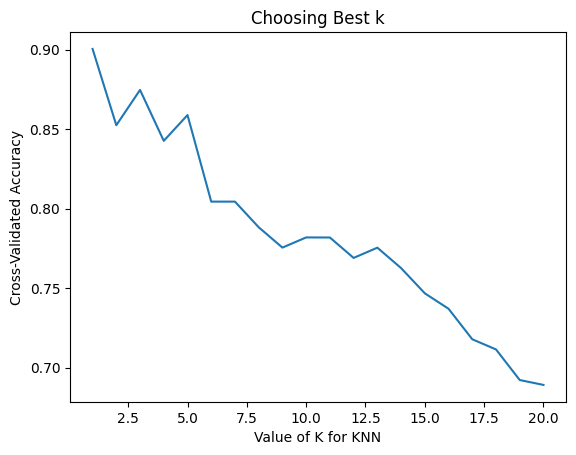

Best k based on cross-validation: 1


In [ ]:
#Choosing best initial K value
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting k vs accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing Best k')
plt.show()

# Best k
best_k = k_range[np.argmax(k_scores)]
print(f"Best k based on cross-validation: {best_k}")

In [ ]:
# Initialize the NearestNeighbors model
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X_train)

NearestNeighbors(metric='euclidean', n_neighbors=1)

In [ ]:
#applying knn to the validation set
distances, indices = knn.kneighbors(X_valid)
# Get the predicted labels for the validation set
y_pred = y_train.iloc[indices.flatten()]

### Model Performance

In [ ]:
# Print the classification report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        83
           1       0.97      0.86      0.91       125

    accuracy                           0.90       208
   macro avg       0.89      0.91      0.90       208
weighted avg       0.91      0.90      0.90       208



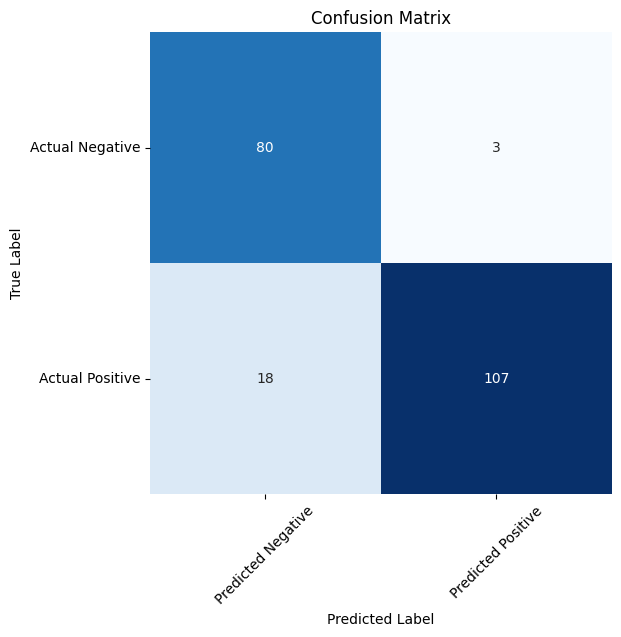

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_valid, y_pred)\
# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df_encoded = df.copy()
df_encoded['class_Positive'] = df_encoded['class'].apply(lambda x: 1 if x == 'Positive' else 0)
df_encoded.drop(columns='class', inplace=True)

# Convert to boolean values for Apriori algorithm
df_boolean = df_encoded.astype(bool)

NameError: name 'df' is not defined

In [ ]:

# Install mlxtend if not already installed
!pip install mlxtend

# Import required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'df' is the original DataFrame used in this notebook
# Modify this line if your DataFrame has a different name or structure
df_encoded = df.copy()
df_encoded['class_Positive'] = df_encoded['class'].apply(lambda x: 1 if x == 'Positive' else 0)
df_encoded.drop(columns='class', inplace=True)

# Convert to boolean values for apriori algorithm
df_boolean = df_encoded.astype(bool)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_boolean, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter rules where the consequent is related to 'class_Positive'
diabetes_rules = rules[rules['consequents'].astype(str).str.contains('class_Positive')]

# Display the results
diabetes_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


NameError: name 'df' is not defined